In [1]:
import linear
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Датасет

In [2]:
weather_ds = pd.read_csv('datasets/weatherHistory.csv')

In [3]:
weather_ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
target = weather_ds['Temperature (C)']
weather_ds = weather_ds[['Precip Type', 'Humidity', 'Pressure (millibars)', 'Temperature (C)']]
weather_ds

,Precip Type,Humidity,Pressure (millibars),Temperature (C)
0,rain,0.89,1015.13,9.472222
1,rain,0.86,1015.63,9.355556
2,rain,0.89,1015.94,9.377778
3,rain,0.83,1016.41,8.288889
4,rain,0.83,1016.51,8.755556
...,...,...,...,...
96448,rain,0.43,1014.36,26.016667
96449,rain,0.48,1015.16,24.583333
96450,rain,0.56,1015.66,22.038889
96451,rain,0.60,1015.95,21.522222


In [5]:
weather_ds = pd.get_dummies(weather_ds, prefix='precip', columns=['Precip Type'])
weather_ds

,Humidity,Pressure (millibars),Temperature (C),precip_rain,precip_snow
0,0.89,1015.13,9.472222,1,0
1,0.86,1015.63,9.355556,1,0
2,0.89,1015.94,9.377778,1,0
3,0.83,1016.41,8.288889,1,0
4,0.83,1016.51,8.755556,1,0
...,...,...,...,...,...
96448,0.43,1014.36,26.016667,1,0
96449,0.48,1015.16,24.583333,1,0
96450,0.56,1015.66,22.038889,1,0
96451,0.60,1015.95,21.522222,1,0


In [6]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Аналитическое решение

In [8]:
an_solution = linear.AnalyticalSolution()
an_solution.fit(X_train, y_train)
y_ = an_solution.predict(X_test)

In [9]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 37.98553149956306
MAE = 5.08863501960753


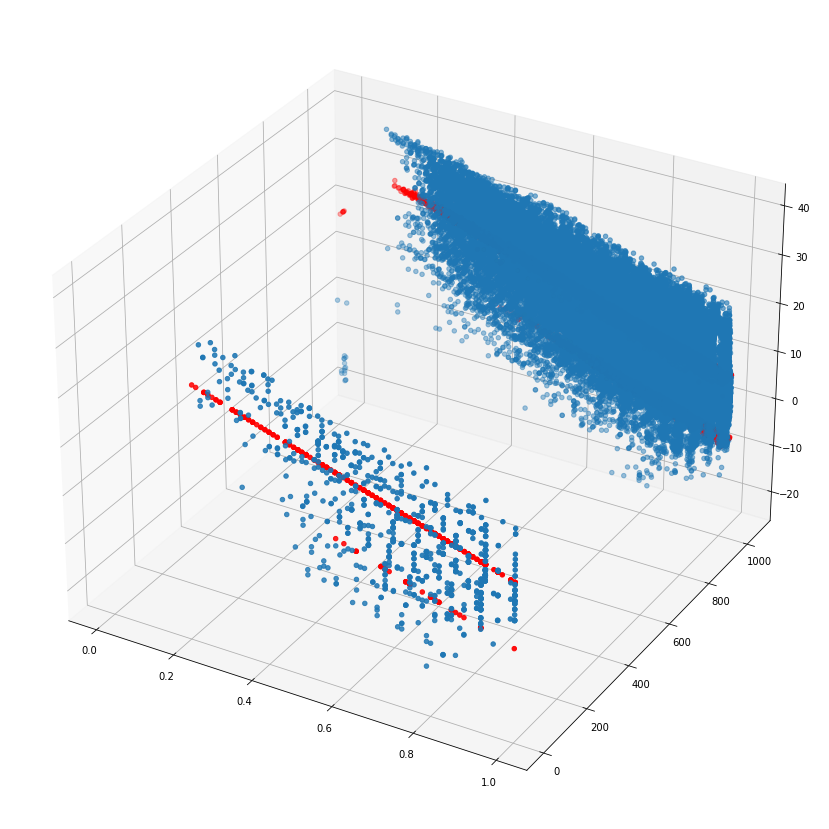

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Видно, что предсказания (красные точки) лежат в правильных "облаках".

# Градиентный спуск

Из-за фичи Pressure градиентный спуск расходился, регуляризация не помогла. Поэтому был дописан метод наискорейшнего спуска - когда мы выбираем оптимальный шаг alpha.
   

In [11]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, tolerance=1, descent_method='normalization const', 
                                   reg_lmb=100, regularization='L2', loss=MSE)
gd.fit(X_train, y_train)

In [12]:
y_ = gd.predict(X_test)

In [13]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 93.46933355972433
MAE = 7.980891618539068


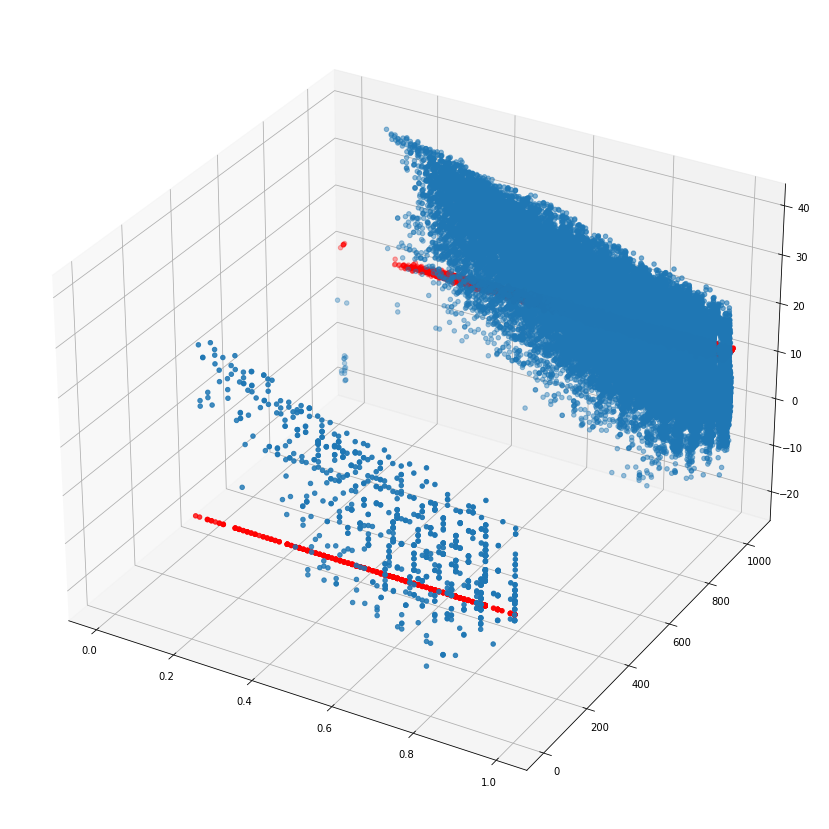

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Метод показал себя гораздо хуже аналитического решения, однако если убрать фичу Pressure то градиентный спуск все же сходится к оптимуму 

In [15]:
X = weather_ds.drop(columns=['Temperature (C)', 'Pressure (millibars)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600)
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 39.01618281759494
MAE = 5.182294187775649


Попробуем отнормировать саму фичу

In [16]:
from data import normalize_columns
weather_ds = weather_ds.rename(columns={'Pressure (millibars)': 'Pressure'})
normalize_columns(weather_ds, columns=['Pressure'])

MSE = 38.634251900394105
MAE = 5.149038069524166


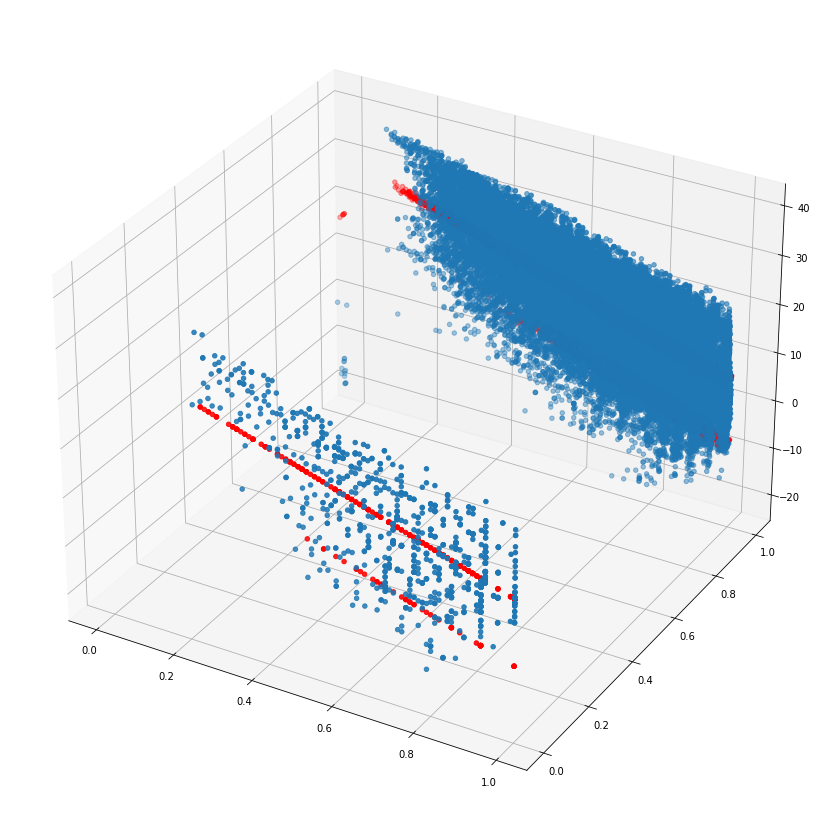

In [17]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600, 
                                   loss = MSE, descent_method='normalization const')
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_, c='red')

Нормировка фичи помогла!!! УРААА

# Stohastic Gradient Descend

MSE = 39.21195956245154
MAE = 5.184386115781777


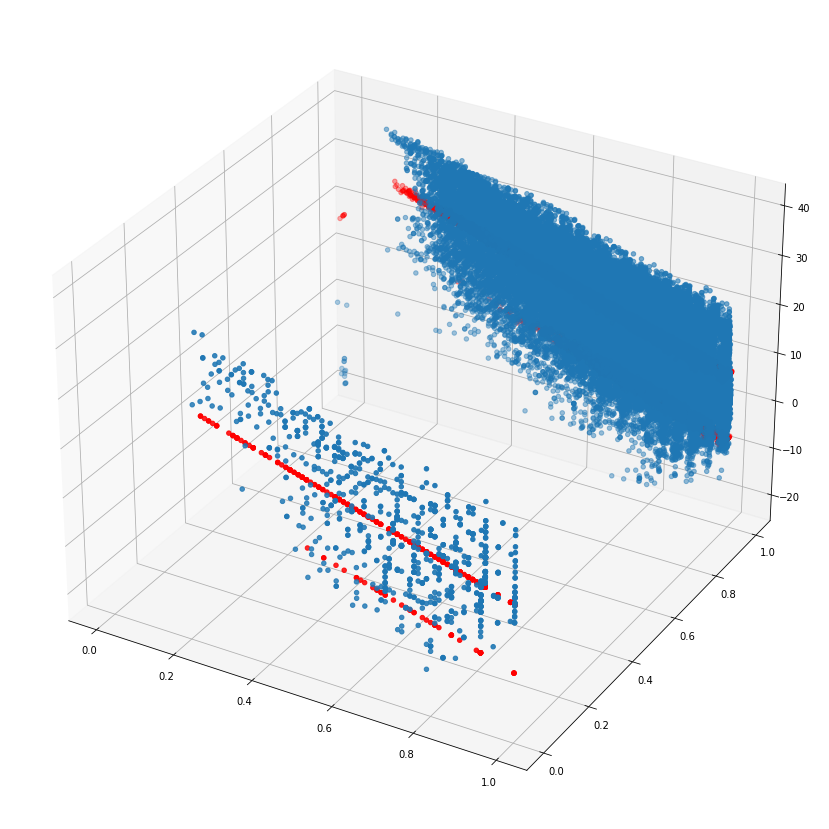

In [18]:
from linear import StochasticGradientDescent
sgd = StochasticGradientDescent(alpha=0.01, eras=5, batch_size=50, tolerance=1, loss=MSE, 
                               descent_method='const')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(f'MSE = {MSE.get_loss(y_test, y_pred)}\nMAE = {MAE.get_loss(y_test, y_pred)}')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_pred, c='red')

# Логистическая регрессия

In [19]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df = iris_df.reset_index()
iris_df = iris_df.drop(columns=['Id', 'index'])
iris_df = iris_df.astype({'Species': 'category'})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris_df['Species'].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

In [21]:
iris_df['is_setosa']= (iris_df['Species'] == 'Iris-setosa').astype(int)
iris_df = iris_df.drop(columns='Species')
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,is_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [22]:
X = iris_df.drop(columns='is_setosa')
y = iris_df['is_setosa']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Оба написанных класса показывают отличный результат классификации:

In [24]:
from linear import StandardGradientDescent
from quality_functional import LogisticLoss
gd = StandardGradientDescent(alpha = 0.1, S = 100, loss=LogisticLoss)
gd.fit(X_train, y_train.to_numpy())

In [25]:
y_proba = gd.predict(X_test)

In [26]:
(y_proba > 0.5) == (y_test == 1)

5      True
79     True
77     True
7      True
65     True
120    True
137    True
22     True
95     True
90     True
59     True
50     True
20     True
140    True
44     True
70     True
45     True
132    True
57     True
81     True
96     True
131    True
21     True
35     True
86     True
8      True
58     True
55     True
125    True
144    True
39     True
147    True
13     True
15     True
89     True
136    True
41     True
146    True
Name: is_setosa, dtype: bool

In [27]:
sgd = StochasticGradientDescent(alpha=0.01, eras=20, tolerance = 1, batch_size=30, loss=LogisticLoss)
sgd.fit(X_train, y_train)
y_proba = sgd.predict(X_test)

In [28]:
(y_proba > 0.5) == (y_test == 1)

5      True
79     True
77     True
7      True
65     True
120    True
137    True
22     True
95     True
90     True
59     True
50     True
20     True
140    True
44     True
70     True
45     True
132    True
57     True
81     True
96     True
131    True
21     True
35     True
86     True
8      True
58     True
55     True
125    True
144    True
39     True
147    True
13     True
15     True
89     True
136    True
41     True
146    True
Name: is_setosa, dtype: bool

## Многоклассовая классификация

In [29]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df = iris_df.reset_index()
iris_df = iris_df.drop(columns=['Id', 'index'])
iris_df = iris_df.astype({'Species': 'category'})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### OneVsAll:

In [32]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, loss=LogisticLoss)
classifier = linear.OneVsAllClassifier(gd)
classifier.fit(X_train, y_train)

In [42]:
y_pred = classifier.predict(X_test)


In [34]:
y_test == y_pred

109     True
34      True
131     True
73     False
35      True
56     False
96     False
108     True
26      True
147     True
71     False
98     False
31      True
102     True
120     True
0       True
37      True
11      True
141     True
69     False
41      True
149     True
64     False
80     False
123     True
101     True
107     True
142     True
143     True
9       True
70     False
99     False
93     False
77     False
130     True
76     False
30      True
55     False
Name: Species, dtype: bool

### AllVsAll

In [35]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, loss=LogisticLoss)
classifier = linear.AllVsAllClassifier(gd)
classifier.fit(X_train, y_train)

/home/kurilab/projects/kurilib-ml/data.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.loc[positive_indexes].append(X.loc[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y[positive_indexes].append(y[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.loc[positive_indexes].append(X.loc[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y[positive_indexes].append(y[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:27: Futu

In [38]:
y_pred = classifier.predict(X_test)


In [40]:
y_test

109     Iris-virginica
34         Iris-setosa
131     Iris-virginica
73     Iris-versicolor
35         Iris-setosa
56     Iris-versicolor
96     Iris-versicolor
108     Iris-virginica
26         Iris-setosa
147     Iris-virginica
71     Iris-versicolor
98     Iris-versicolor
31         Iris-setosa
102     Iris-virginica
120     Iris-virginica
0          Iris-setosa
37         Iris-setosa
11         Iris-setosa
141     Iris-virginica
69     Iris-versicolor
41         Iris-setosa
149     Iris-virginica
64     Iris-versicolor
80     Iris-versicolor
123     Iris-virginica
101     Iris-virginica
107     Iris-virginica
142     Iris-virginica
143     Iris-virginica
9          Iris-setosa
70     Iris-versicolor
99     Iris-versicolor
93     Iris-versicolor
77     Iris-versicolor
130     Iris-virginica
76     Iris-versicolor
30         Iris-setosa
55     Iris-versicolor
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [41]:
y_pred

0      Iris-virginica
1         Iris-setosa
2      Iris-virginica
3     Iris-versicolor
4         Iris-setosa
5     Iris-versicolor
6     Iris-versicolor
7      Iris-virginica
8         Iris-setosa
9      Iris-virginica
10    Iris-versicolor
11    Iris-versicolor
12        Iris-setosa
13     Iris-virginica
14     Iris-virginica
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18     Iris-virginica
19    Iris-versicolor
20        Iris-setosa
21     Iris-virginica
22    Iris-versicolor
23    Iris-versicolor
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
27     Iris-virginica
28     Iris-virginica
29        Iris-setosa
30     Iris-virginica
31    Iris-versicolor
32    Iris-versicolor
33    Iris-versicolor
34     Iris-virginica
35    Iris-versicolor
36        Iris-setosa
37    Iris-versicolor
dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [46]:
y_test == y_pred

ValueError: Can only compare identically-labeled Series objects